In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [3]:
customers = pd.read_csv("customers.csv")

In [4]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Kiểm tra các giá trị null

In [5]:
print(f"Missing values in each variable: \n{customers.isnull().sum()}")

Missing values in each variable: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Kiểm tra số dòng bị lặp

In [7]:
print(f"Duplicated rows: {customers.duplicated().sum()}")

Duplicated rows: 0


# Data Type

In [8]:
print(f"Variable                  Type: \n{customers.dtypes}")

Variable                  Type: 
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


# Descriptive statistics and Distribution

In [9]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Vễ đồ thị phân phối tương ứng

<ipython-input-10-0deafc0771fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers["Spending Score (1-100)"], bins = 20)


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

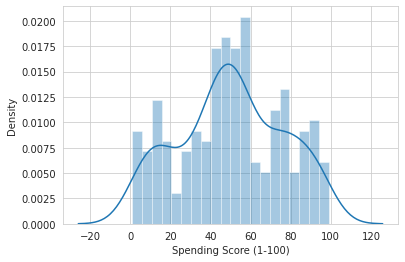

In [10]:
sns.distplot(customers["Spending Score (1-100)"], bins = 20)

<ipython-input-11-5805d0412570>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers["Annual Income (k$)"], bins = 20)


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

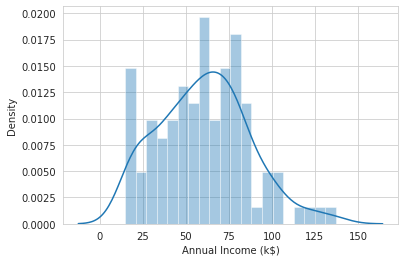

In [11]:
sns.distplot(customers["Annual Income (k$)"], bins = 20)

# **Correlation(tương quan) between parameteres**
Also, we will analyze the correlation between the numeric parameters. For that aim, we'll use the pairplot seaborn function. We want to see whether there is a difference between gender. So, we are going to set the hue parameter to get different colors for points belonging to female or customers.

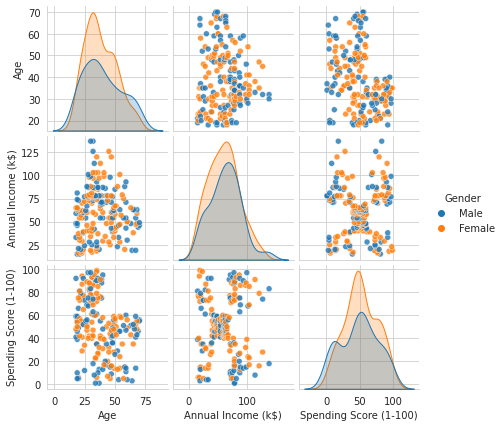

In [12]:
sns.pairplot(customers, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
             y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"],
                      hue = "Gender",
                      kind = "scatter",
                      height = 2,
                      plot_kws = {"s": 35, "alpha": 0.8});

**why is it important to look into the descriptive statistics, distribution and correlation between variable?**

In order to apply K-means, we need to meet the algo assumptions

K-means assumes(cho rằng):
- **Cluster's shape**: The variance of the distribution is spherical meaning that clusters have a spherical shape. In order for this to be true, all variables should be normally distributed and have the same variance.
- **Clusters' Size**: All clusters have the same number of observations.
- **Relationship between variables**: There is little or no correlation between the variables.

In our dataset, our variables are normally distributed. Variances are quite close to each other. Except for age that has a lower variance that the rest of the variables. We could find a proper transformation to solve this issue. We could apply the logarithm or Box-Cox transformation.  Box-Cox is a family of transformations which allows us to correct non-normal distributed variables or non-equal variances.


**Dimensionality reduction**

After we checked that we can apply k-means, we can apply Principal Component Analysis (PCA) to discover which dimensions best maximize the variance of features involved.

**Principal Component Analysis (PCA)**

First, we'll transform the categorical variable into twon binary variables

In [13]:
customers["Male"] = customers.Gender.apply(lambda x: 0 if x == "Male" else 1)

In [14]:
customers["Female"] = customers.Gender.apply(lambda x: 0 if x == "Female" else 1)

Then, we are going to select from the dataset all the useful columns. Customer ID is not a useful feature. Gender will split it into two binaries categories. It should not appear in the final dataset

In [15]:
X = customers.iloc[:, 2:]

In [16]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,Female
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


Hàm PCA trong thư viện sklearn của Python được sử dụng để thực hiện phân tích thành phần chính (PCA) trên một tập dữ liệu. PCA là một phương pháp giảm số chiều dữ liệu bằng cách ánh xạ các điểm dữ liệu từ không gian nhiều chiều xuống không gian ít chiều hơn, trong đó các chiều mới được xác định bằng cách tối đa hoá sự khác biệt giữa các điểm dữ liệu.

In [17]:
#Apply PCA and fit the features selected
pca = PCA(n_components = 2).fit(X)

In [18]:
print(pca.components_)

[[-1.88980385e-01  5.88604475e-01  7.86022241e-01  3.32880772e-04
  -3.32880772e-04]
 [ 1.30957602e-01  8.08400899e-01 -5.73875514e-01 -1.57927017e-03
   1.57927017e-03]]


In [19]:
print(pca.explained_variance_)

[700.26450987 684.33354753]


In [20]:
print(pca.explained_variance_ratio_)

[0.45110884 0.44084615]


These numbers that appear to be abstract define vectors. The components define the direction of the vector while the explained variance define the squared-length of the vector.

The vectors represent the principal axes of the data. The length of the vector indicates the importance of that axis in describing the distribution of the data. The projection of each data point onto the principal axes are the principal components of the data.

In [21]:
# Transform samples using the PCA fit
pca_2d = pca.transform(X)

We can represent this using a type of scatter plot called biplot. Each point is represented by its score regarding the principal components. It is helpful to understand the reduced dimensions of the data. It also helps us discover relationships between the principal components and the original variables.

We can observe that Annual Income as well as Spending Score at the two most important components.

**K-means clustering**
Time for clustering!

In order to cluster data, we need to determine how to tell if two data points are similar. A proximity measure characterizes the similarity or dissimilarity that exists between objects.

We can choose to determine if two points are similar. So if the value is large, the points are very similar. Or choose to determine if they are dissimilar. If the value is small, the points are similar. This is what we know as "distance".

There are various distances that a clustering algorithm can use: Manhattan distance, Minkowski distance, Euclidean distance, among others.

$(\sqrt{\sum_{i=1}^n(x_i-y_i)^2}$
 
K-means typically uses Euclidean distance to determine how similar (or dissimilar) two points are.

First, we need to fix the numbers of clusters to use.

There are several direct methods to perform this. Among them, we find the elbow and silhouette methods.

We'll consider the total intra-cluster variation (or total within-cluster sum of square (WSS)). The goal is to minimize WSS.

The Elbow method looks at how the total WSS varies with the number of clusters.  For that, we'll compute k-means for a range of different values of k. Then, we calculate the total WSS. We plot the curve WSS vs. number of clusters.  Finally, we locate the elbow or bend of the plot. This point is considered to be the appropriate number of clusters.

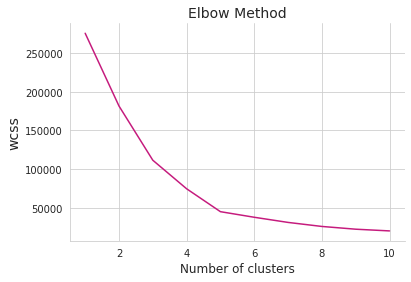

In [22]:
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
  km.fit(pca_2d)
  wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

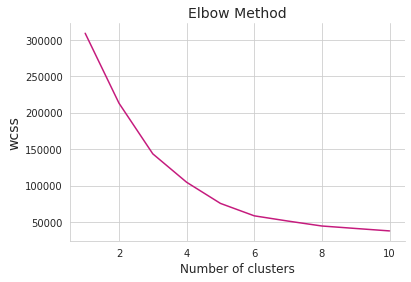

In [23]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

How does k-means clustering works? The main idea is to select k centers, one for each cluster. There are several ways to initialize those centers. We can do it randomly, pass certain points that we believe are the center or place them in a smart way (e.g. as far away from each other as possible). Then, we calculate the Euclidean distance between each point and the cluster centers. We assign the points to the cluster center where the distance is minimum. After that, we recalculate the new cluster center. We select the point that is in the middle of each cluster as the new center.  And we start again, calculate distance, assign to cluster, calculate new centers. When do we stop? When the centers do not move anymore.

In [24]:
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 5
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

# Fit and predict 
y_means = kmeans.fit_predict(X)

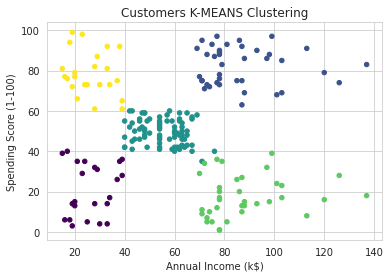

In [25]:
plt.scatter(customers["Annual Income (k$)"], 
            customers["Spending Score (1-100)"], 
            c=y_means, s=20, cmap='viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customers K-MEANS Clustering");

In [29]:
#centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ["Age", "Annual Income", "Spending", "Male", "Female"])
centroids = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=["Age", "Annual Income", "Spending", "Male", "Female"]
)

In [30]:
centroids.index_name = "clusterID"

In [31]:
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop = True)

In [32]:
centroids

,Age,Annual Income,Spending,Male,Female,ClusterID
0,45.217391,26.304348,20.913043,0.608696,0.391304,0
1,32.692308,86.538462,82.128205,0.538462,0.461538,1
2,43.088608,55.291139,49.569620,0.582278,0.417722,2
3,40.666667,87.750000,17.583333,0.472222,0.527778,3
4,25.521739,26.304348,78.565217,0.608696,0.391304,4


The most important features appear to be Annual Income and Spending score. We have people whose income is low but spend in the same range-segment 0. People whose earnings a high and spend a lot-segment 1. Customers whose income is middle range but also spend at the same level-segment 2. Then we have customers whose income is very high but they have most spendings-segment 4. And last, people whose earnings are little but they spend a lot-segment 5.

Imagine that tomorrow we have a new member. And we want to know which segment that person belongs. We can predict this.

In [33]:
X_new = np.array([[43, 76, 56, 0, 1]])

new_customer = kmeans.predict(X_new)
print(f"The new customer belongs to segment {new_customer[0]}")

The new customer belongs to segment 2


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### **Verify with Hierarchical Clustering(phân cụm)**

In [34]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

# Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Adjusted Rand Score
linkage_type = 'ward'

linkage_matrix = linkage(pca_2d, linkage_type)

<function matplotlib.pyplot.show(close=None, block=None)>

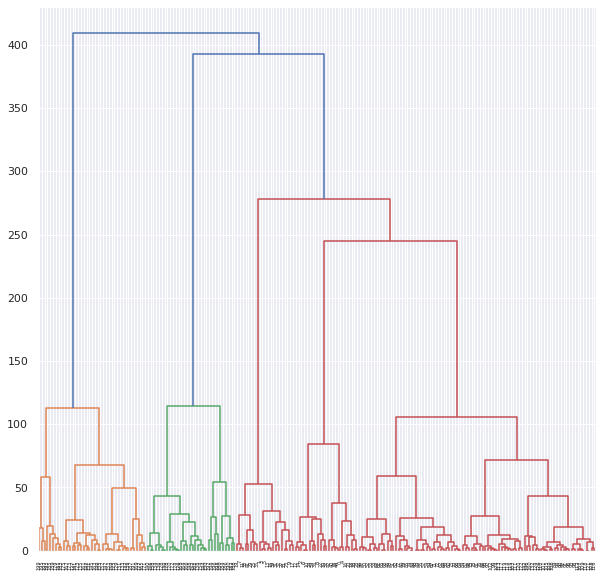

In [35]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.set()

# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show

In [38]:
from sklearn.cluster import AgglomerativeClustering
# Hierarchical clustering
from sklearn import preprocessing

#normalized_X = preprocessing.normalize(iris.data)

ward = AgglomerativeClustering(n_clusters=5)
ward_pred = ward.fit_predict(pca_2d)

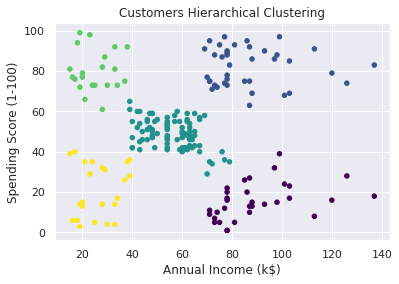

In [39]:
plt.scatter(customers["Annual Income (k$)"],
            customers["Spending Score (1-100)"],
            c = ward_pred, s = 20, cmap = 'viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customers Hierarchical Clustering");